### LIBRERIAS

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression

### LECTURA ARCHIVO CSV

In [3]:
df = pd.read_csv(r'clubes padel\EXCEL\costos_unidos.csv', sep=';')
df

,ID_CLUB,HORA,DIA,COSTO,TIEMPO
0,BOG01,00:00 - 01:00,L-V,32000,HORA
1,BOG01,01:00 - 02:00,L-V,32000,HORA
2,BOG01,02:00 - 03:00,L-V,32000,HORA
3,BOG01,03:00 - 04:00,L-V,32000,HORA
4,BOG01,04:00 - 05:00,L-V,32000,HORA
...,...,...,...,...,...
682,BOG23,12:00 - 13:30,S-F,160000,HORA Y MEDIA
683,BOG23,16:00 - 17:30,S-F,160000,HORA Y MEDIA
684,BOG23,17:30 - 19:00,S-F,160000,HORA Y MEDIA
685,BOG23,19:00 - 20:30,S-F,160000,HORA Y MEDIA


### GRÁFICOS DE DISPERSIÓN DE PRECIOS A LO LARGO DEL DIA

### Para entre semana

In [ ]:
# Obtener un df con los días de entre semana
df_filtrado = df[df['DIA'] == 'L-V'].copy()

In [13]:
# Convertir los intervalos de HORA a un valor numérico (hora de inicio)
def extraer_hora_inicio(intervalo):
    hora_inicial = intervalo.split('-')[0].strip()
    hora, minutos = map(int, hora_inicial.split(':'))
    return hora + minutos / 60

In [14]:
# Crear una columna con la hora de inicio en formato numérico
df_filtrado['HORA_NUM'] = df_filtrado['HORA'].apply(extraer_hora_inicio)

In [15]:
# Variables para la linea regresión
X = df_filtrado['HORA_NUM'].values.reshape(-1, 1)  
y = df_filtrado['COSTO'].values 

In [16]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [17]:
# Calcular la línea de tendencia
y_pred = modelo.predict(X)

In [18]:
# Asignar colores a las categorías de 'TIEMPO'
unique_tiempos = df_filtrado['TIEMPO'].unique()
color_map = {unique_tiempos[0]: 'royalblue', unique_tiempos[1]: 'orange'}
colors = df_filtrado['TIEMPO'].map(color_map)

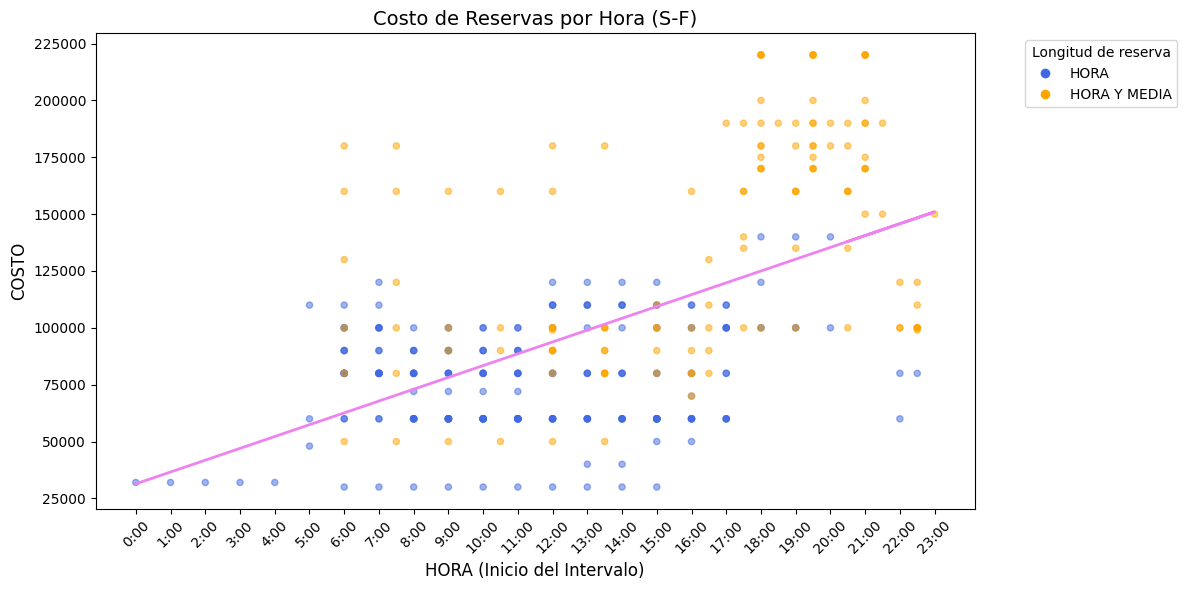

In [26]:
# Crear la figura
plt.figure(figsize=(12, 6))

# Gráfico de dispersión
plt.scatter(df_filtrado['HORA_NUM'], df_filtrado['COSTO'], s=20, c=colors, alpha=0.5, label='Datos')

# Línea de tendencia
plt.plot(df_filtrado['HORA_NUM'], y_pred, color='violet', linewidth=2, label=f'Línea de tendencia')

# Crear la leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=tiempo)
           for tiempo, color in color_map.items()]
plt.legend(handles=handles, title='Longitud de reserva', bbox_to_anchor=(1.05, 1), loc='upper left')

# Configuración del gráfico
min_hora = df_filtrado['HORA_NUM'].min()
max_hora = df_filtrado['HORA_NUM'].max()
step = 1.0
xticks = np.arange(min_hora, max_hora + step, step)
plt.xticks(xticks, labels=[f"{int(h)}:00" for h in xticks], rotation=45, fontsize=10)
plt.xlabel('HORA (Inicio del Intervalo)', fontsize=12)
plt.ylabel('COSTO', fontsize=12)
plt.title('Costo de Reservas por Hora (S-F)', fontsize=14)

# Ajustar el diseño
plt.tight_layout()
plt.show()

##### Para fines de semana

In [ ]:
# Obtener un df con los días de entre semana
df_filtrado = df[df['DIA'] == 'S-F'].copy()

In [ ]:
# Convertir los intervalos de HORA a un valor numérico (hora de inicio)
def extraer_hora_inicio(intervalo):
    hora_inicial = intervalo.split('-')[0].strip()
    hora, minutos = map(int, hora_inicial.split(':'))
    return hora + minutos / 60 

In [ ]:
# Crear una columna con la hora de inicio en formato numérico
df_filtrado['HORA_NUM'] = df_filtrado['HORA'].apply(extraer_hora_inicio)

In [ ]:
# Variables para la linea regresión
X = df_filtrado['HORA_NUM'].values.reshape(-1, 1)  
y = df_filtrado['COSTO'].values 

In [ ]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

In [ ]:
# Calcular la línea de tendencia
y_pred = modelo.predict(X)

In [ ]:
# Asignar colores a las categorías de 'TIEMPO'
unique_tiempos = df_filtrado['TIEMPO'].unique()
color_map = {unique_tiempos[0]: 'royalblue', unique_tiempos[1]: 'orange'}
colors = df_filtrado['TIEMPO'].map(color_map)

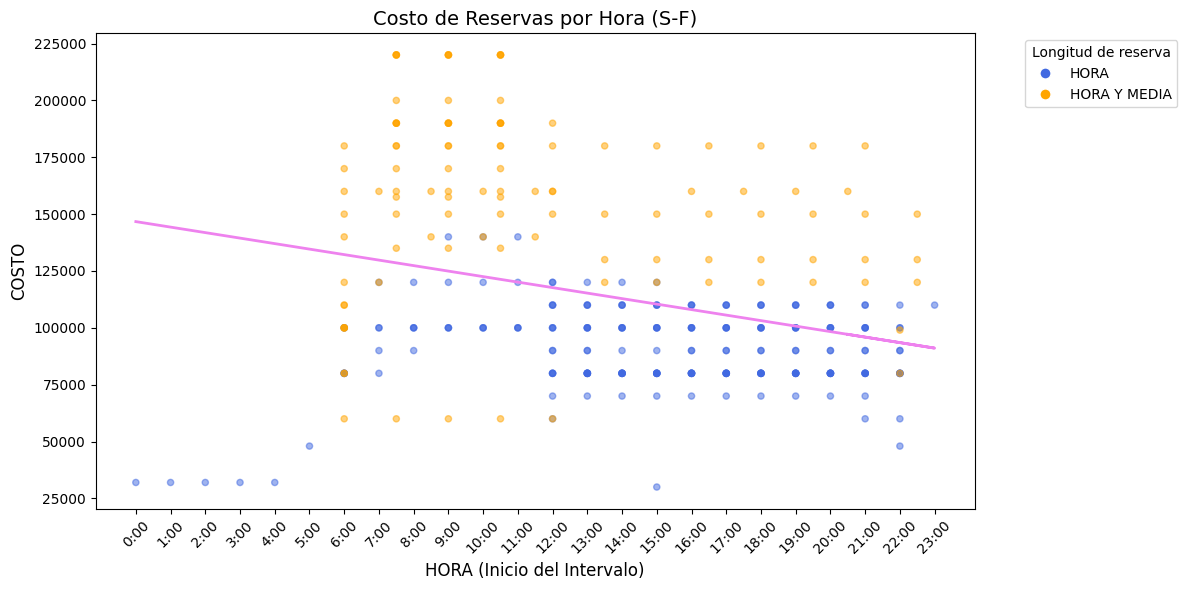

In [ ]:

# Crear la figura
plt.figure(figsize=(12, 6))

# Gráfico de dispersión
plt.scatter(df_filtrado['HORA_NUM'], df_filtrado['COSTO'], s=20, c=colors, alpha=0.5, label='Datos')

# Línea de tendencia
plt.plot(df_filtrado['HORA_NUM'], y_pred, color='violet', linewidth=2, label=f'Línea de tendencia')

# Crear la leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=tiempo)
           for tiempo, color in color_map.items()]
plt.legend(handles=handles, title='Longitud de reserva', bbox_to_anchor=(1.05, 1), loc='upper left')

# Configuración del gráfico
min_hora = df_filtrado['HORA_NUM'].min()
max_hora = df_filtrado['HORA_NUM'].max()
step = 1.0
xticks = np.arange(min_hora, max_hora + step, step)
plt.xticks(xticks, labels=[f"{int(h)}:00" for h in xticks], rotation=45, fontsize=10)
plt.xlabel('HORA (Inicio del Intervalo)', fontsize=12)
plt.ylabel('COSTO', fontsize=12)
plt.title('Costo de Reservas por Hora (S-F)', fontsize=14)

# Ajustar el diseño
plt.tight_layout()
plt.show()


### COLUMNA NUEVA CON MOMENTO DEL DIA

In [28]:
# Función para determinar el momento del día
def determinar_momento_dia(intervalo):
    # Extrae la hora de inicio del intervalo
    hora_inicial = intervalo.split('-')[0].strip()
    hora, minutos = map(int, hora_inicial.split(':'))
    hora_decimal = hora + minutos / 60  # Convierte la hora a formato decimal

    # Determinar el momento del día
    if 0 <= hora_decimal < 12:
        return 'MANANA'
    elif 12 <= hora_decimal <= 17:
        return 'TARDE'
    else:
        return 'NOCHE'

In [29]:
# Crear la nueva columna 'MOMENTO_DIA'
df['MOMENTO_DIA'] = df['HORA'].apply(determinar_momento_dia)


              HORA MOMENTO_DIA
682  12:00 - 13:30       TARDE
683  16:00 - 17:30       TARDE
684  17:30 - 19:00       NOCHE
685  19:00 - 20:30       NOCHE
686  20:30 - 22:00       NOCHE


In [ ]:
# Mostrar los primeros resultados para verificar
print(df[['HORA', 'MOMENTO_DIA']].tail())

### EXTRAER ARCHIVO CSV

In [ ]:
nombre_archivo = 'df_con_momento_dia.csv'

df.to_csv(nombre_archivo, index=False, sep=';')
print(f"Archivo guardado como {nombre_archivo}")

Archivo guardado como df_con_momento_dia2.csv
